## In this first project I will do...

### Explaning project...

#### Project Description
For this set of projects, we will use a combination of data manipulation and visualization to explore television data. In this project's guided variant, you will look at Super Bowl Data, generating insights into game outcomes, viewership, and even halftime shows. 
- Conclusion:
In the unguided variant of this project, we'll develop an informative plot that helps to visualize the viewership and quality of The Office throughout its nine seasons.

#### Steps to do this project:

1. TV, halftime shows, and the Big Game
2. Taking note of dataset issues
3. Combined points distribution
4. Point difference distribution
5. Do blowouts translate to lost viewers?
6. Viewership and the ad industry over time
7. Halftime shows weren't always this great
8. Who has the most halftime show appearances?
9. Who performed the most songs in a halftime show?

#### This project is guided...

#### 1. Loading data sets

In [1]:
import pandas as pd
super_bowls = pd.read_csv('/media/j/hd/my-data-sets/data-camp/super_bowls.csv')
tv = pd.read_csv('/media/j/hd/my-data-sets/data-camp/tv.csv')
musicians = pd.read_csv('/media/j/hd/my-data-sets/data-camp/halftime_musicians.csv')

In [2]:
display(super_bowls.head(10))
display(tv.head(10))
display(musicians.head(10))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
6,2012-02-05,46,Lucas Oil Stadium,Indianapolis,Indiana,68658,New York Giants,21,Eli Manning,NaN,Tom Coughlin,New England Patriots,17,Tom Brady,NaN,Bill Belichick,38,4
7,2011-02-06,45,Cowboys Stadium,Arlington,Texas,103219,Green Bay Packers,31,Aaron Rodgers,NaN,Mike McCarthy,Pittsburgh Steelers,25,Ben Roethlisberger,NaN,Mike Tomlin,56,6
8,2010-02-07,44,Sun Life Stadium,Miami Gardens,Florida,74059,New Orleans Saints,31,Drew Brees,NaN,Sean Payton,Indianapolis Colts,17,Peyton Manning,NaN,Jim Caldwell,48,14
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,NaN,Mike Tomlin,Arizona Cardinals,23,Kurt Warner,NaN,Ken Whisenhunt,50,4


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000
5,47,CBS,108693000,164100000.0,46.3,69,39.7,77.0,4000000
6,46,NBC,111346000,163500000.0,47.0,71,40.5,NaN,3500000
7,45,Fox,111041000,162900000.0,46.0,69,39.9,NaN,3100000
8,44,CBS,106476000,153400000.0,45.0,68,38.6,NaN,2800000
9,43,NBC,98732000,151600000.0,42.0,64,36.7,NaN,3000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
5,50,Bruno Mars,3.0
6,50,Mark Ronson,1.0
7,50,University of California Marching Band,3.0
8,50,Youth Orchestra Los Angeles,3.0
9,50,Gustavo Dudamel,3.0


1. Above we can check some information about each data set that we will work in
2. We can perceive that some data don't are shown - like: musicians data set, on indexes 6 to 9...
3. We'll use info() to understand more about our data

#### 2. Checking data types, description...

In [3]:
tv.info()
print('\n')
musicians.info()
print('\n')
super_bowls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

1. We can understand that some informations are like Non-Null... What can We do with this?


#### 3. Bulding plots

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline 
#This comand above help us because using it, we don't need use display() or print()

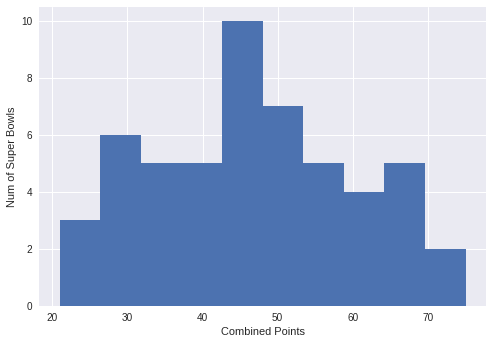

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [5]:
plt.style.use('seaborn') # Coloring our plot

# Showing our data set super_bowls in the column combined_pts and organizing them
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Num of Super Bowls')
plt.show()

display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

#### 4. Creating a reference points:

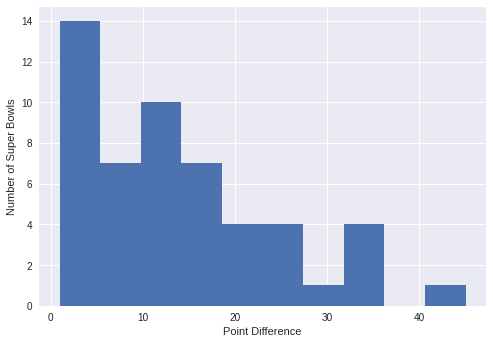

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


In [6]:
#Knowing the difference points plot

plt.hist(super_bowls['difference_pts'])
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# The smaller combined scores is 1
# Most combined scores are around 40-50 points

#We'll search for the smaller and bigger difference
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 38])

#### 5. More about visualization:

- We'll use a linear regression - to estimate a simple relationship between two noisy sets of observations - from seaborn. It because the simple plot isn't enough.
- The objective is to make a simple and quick visualization of our data sets...
- "https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models" <- More about the linear regression function

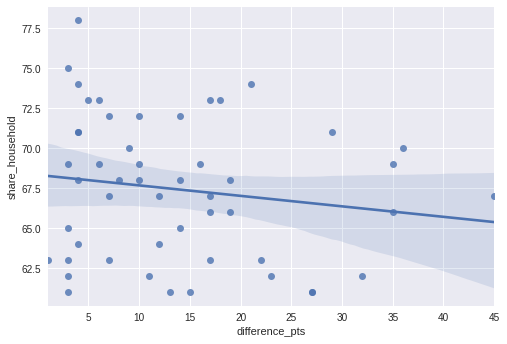

In [9]:
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl') # The merge is used to merge a specific column or row data

import seaborn as sns # importing the package that contains the function that makes a linear regression

sns.regplot(x= "difference_pts", y= "share_household", data = games_tv);

#### 6. Analyzing the cost:

If so many people are waiting for a show, therefore the cost will be high and so let's how have number of viewers and household ratings trended alongside ad cost?

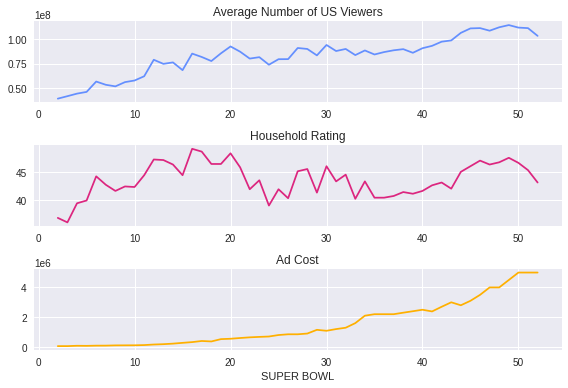

In [15]:
plt.subplot(3, 1, 1) # Creating a figure with 3x1 subplot and activate the top subplot
plt.plot(games_tv.super_bowl, games_tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

plt.subplot(3, 1, 2) # Activating the middle subplot
plt.plot(games_tv.super_bowl, games_tv.rating_household,'#DC267F')
plt.title('Household Rating')

plt.subplot(3, 1, 3) # Activate the bottom subplot
plt.plot(games_tv.super_bowl, games_tv.ad_cost, '#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

plt.tight_layout(); # Improving the spacing between subplots

#### 7. Analyzing who was the singers of halftime super bowls

In [27]:
musicians[musicians['super_bowl'] >=27] # After 27 because audience increased 

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
76,28,Tanya Tucker,2.0
77,28,Travis Tritt,2.0
78,28,The Judds,1.0
79,28,Wynonna Judd,2.0
